# Multi‑Frequency Signal Analysis

In this notebook I’m combining two sine waves (5 Hz and 25 Hz),  
visualizing the result, and using FFT to identify and isolate each component.


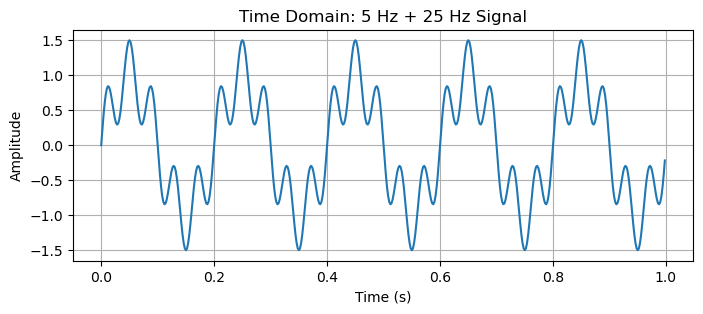

In [2]:
#Generating a two-tone signal
import numpy as np
import matplotlib.pyplot as plt

# Sampling setup
fs = 500            # samples/sec
duration = 1.0      # seconds
t = np.linspace(0, duration, int(fs*duration), endpoint=False)

# Create two sine waves: 5 Hz and 25 Hz
f1, f2 = 5, 25
sig1 = np.sin(2 * np.pi * f1 * t)
sig2 = 0.5 * np.sin(2 * np.pi * f2 * t)   # lower amplitude for 25 Hz
combined_signal = sig1 + sig2

# Plot time‑domain
plt.figure(figsize=(8, 3))
plt.plot(t, combined_signal, label='Combined Signal')
plt.title("Time Domain: 5 Hz + 25 Hz Signal")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.grid(True)
plt.show()


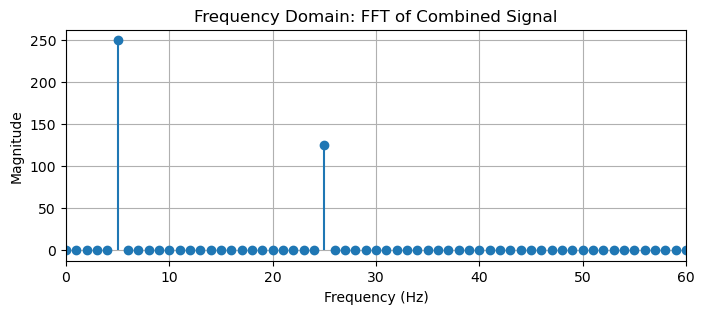

In [4]:
#Plotting the fft
# FFT of combined signal
fft_vals = np.fft.fft(combined_signal)
fft_freqs = np.fft.fftfreq(len(fft_vals), 1/fs)

# Positive half
mask = fft_freqs >= 0
fft_freqs = fft_freqs[mask]
fft_power = np.abs(fft_vals[mask])

# Plot spectrum
plt.figure(figsize=(8, 3))
plt.stem(fft_freqs, fft_power, basefmt=" ")
plt.title("Frequency Domain: FFT of Combined Signal")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.xlim(0, 60)
plt.grid(True)
plt.show()


## Isolating the 5 Hz Component

I’ll zero out everything above 10 Hz in the frequency domain and invert back.


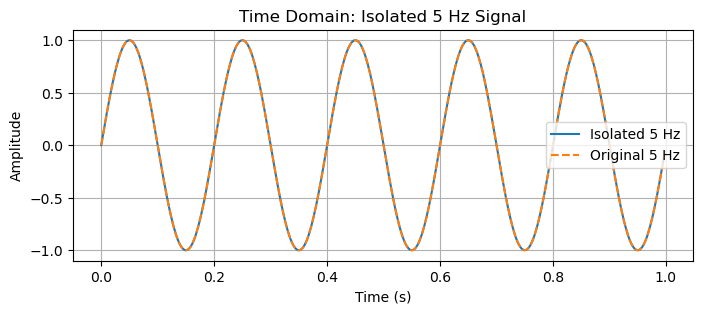

In [7]:
# Create a mask to keep below 10 Hz
filter_mask = fft_freqs < 10

# Apply mask in full FFT array (signed frequencies)
full_mask = np.abs(np.fft.fftfreq(len(fft_vals), 1/fs)) < 10
filtered_fft = fft_vals * full_mask

# Inverse FFT
isolated_5hz = np.fft.ifft(filtered_fft).real

# Plot isolated signal
plt.figure(figsize=(8, 3))
plt.plot(t, isolated_5hz, label='Isolated 5 Hz')
plt.plot(t, sig1, '--', label='Original 5 Hz')
plt.title("Time Domain: Isolated 5 Hz Signal")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.legend()
plt.grid(True)
plt.show()


## Isolating the 25 Hz Component

Now I’ll do the opposite—keep only frequencies above, say, 20 Hz.


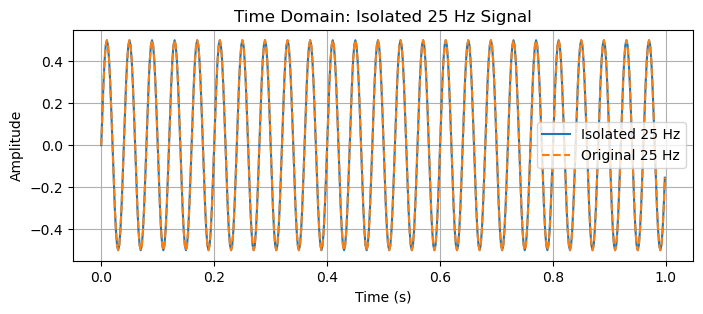

In [10]:
# Mask to keep above 20 Hz
full_mask_high = np.abs(np.fft.fftfreq(len(fft_vals), 1/fs)) > 20
filtered_fft_high = fft_vals * full_mask_high

# Inverse FFT
isolated_25hz = np.fft.ifft(filtered_fft_high).real

# Plot
plt.figure(figsize=(8, 3))
plt.plot(t, isolated_25hz, label='Isolated 25 Hz')
plt.plot(t, sig2, '--', label='Original 25 Hz')
plt.title("Time Domain: Isolated 25 Hz Signal")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.legend()
plt.grid(True)
plt.show()


## Insights

- The FFT clearly shows peaks at 5 Hz and 25 Hz.
- Filtering below 10 Hz cleanly recovers the 5 Hz component.
- Filtering above 20 Hz cleanly recovers the 25 Hz component.
- This demonstrates selective frequency isolation, a key technique in seismic signal processing.
